In [1]:
import numpy as np

In [2]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, x,y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+x.shape[1])
        
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xj, yj in zip(x, y):
                update = self.eta * (yj - self.predict(xj))
                self.w_[1:] += update*xj
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, x):
        y = np.dot(x, self.w_[1:]) + self.w_[0]
        return y
    
    def predict(self, x):
        return np.where(self.net_input(x) >= 0.0, 1, -1)

In [3]:
import os
import pandas as pd

In [4]:
s = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'iris','iris.data')

In [5]:
print('URL:', s)

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [6]:
df = pd.read_csv(s, header=None, encoding='utf-8')

In [7]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
import matplotlib.pyplot as plt


y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

x = df.iloc[0:100, [0, 2]].values

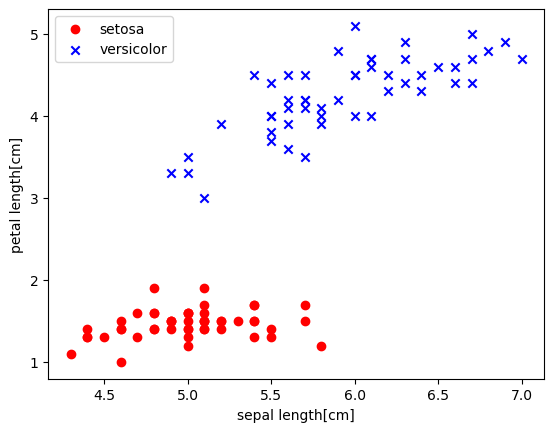

In [9]:
plt.scatter(x[:50,0], x[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(x[50:100, 0], x[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length[cm]')
plt.ylabel('petal length[cm]')
plt.legend(loc='upper left')
plt.show()

In [10]:
ppn = Perceptron(eta=0.1 ,n_iter=10)
ppn.fit(x,y)

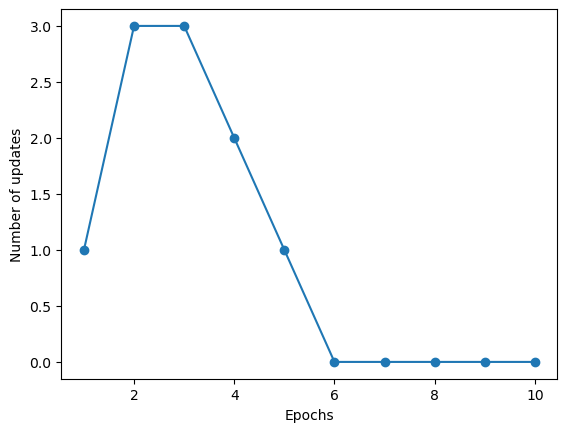

In [11]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [12]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

/tmp/ipykernel_6008/2573366654.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


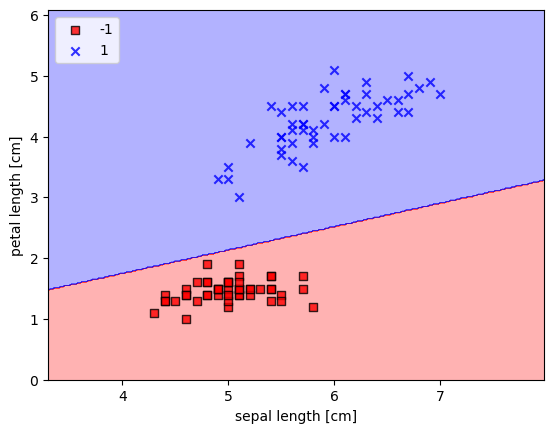

In [13]:
plot_decision_regions(x, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

In [14]:
# Implementing Adaline


class AdalineGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def net_input(self, x):
        return np.dot(x, self.w_[1:]) + self.w_[0]
        
    def activation(self , x):
        return x
        
    def fit(self, x, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+x.shape[1])
        self.cost_ = []
        
        for _ in range(self.n_iter):
            net_input = self.net_input(x)
            output = self.activation(net_input)
            errors = y - output
            self.w_[1:] += self.eta * x.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum()/2.0
            self.cost_.append(cost)
        return self
    
    def predict(self, x):
        return np.where(self.activation(self.net_input(x))>=0.0 , 1, -1)

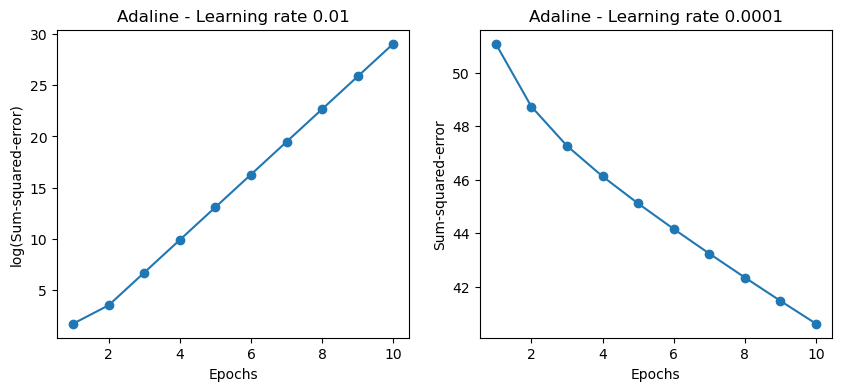

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(x, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(x, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

In [16]:
# using Standardization for better performance 


## standardization

x_std = np.copy(x)
x_std[:, 0] = (x_std[:, 0] - x_std[:, 0].mean()) / x_std[:, 0].std()
x_std[:, 1] = (x_std[:, 1] - x_std[:, 1].mean()) / x_std[:, 1].std()

In [17]:
## run ADALINE

ada_gd = AdalineGD(eta=0.01 , n_iter=15)
ada_gd.fit(x_std, y)

/tmp/ipykernel_6008/2573366654.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


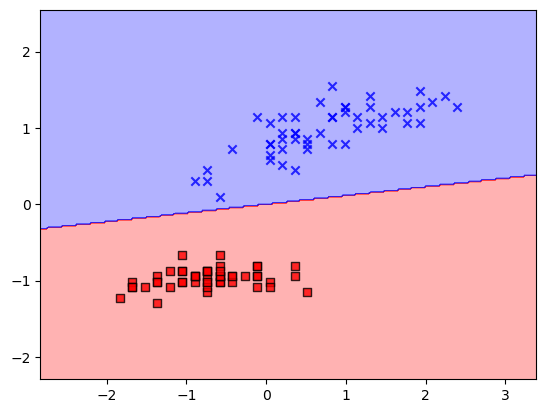

In [18]:
plot_decision_regions(x_std, y, classifier=ada_gd)

In [19]:
class AdalineSGD:
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
        
    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1+m)
        self.w_initialized = True
        
    def _shuffle(self, x, y):
        r = self.rgen.permutation(len(y))
        return x[r], y[r]
        
    def net_input(self, x):
        return np.dot(x, self.w_[1:]) + self.w_[0]
        
    def activation(self, x):
        return x
        
    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * error * xi
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
        
    def fit(self, x, y):
        self._initialize_weights(x.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                x, y = self._shuffle(x, y)
            cost = []
            for xi , target in zip(x, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(cost)
            self.cost_.append(avg_cost)
        return self
        
    def partial_fit(self, x, y):
        if not self.w_initialized:
            self._initialize_weights(x.shape[1])
        if x.ravel().shape[0] > 1:
            for xi, target in zip(x, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(x, y)
        return self
    
    def predict(self, x):
        return np.where(self.activation(self.net_input(x))>=0 , 1, -1)

In [21]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(x_std, y)

/tmp/ipykernel_6008/2573366654.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


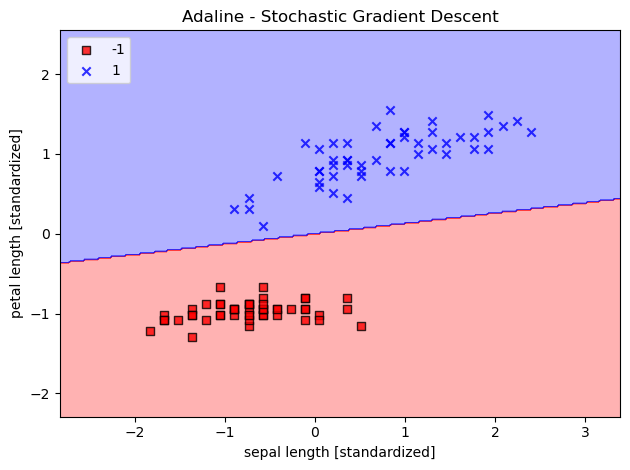

In [23]:
plot_decision_regions(x_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

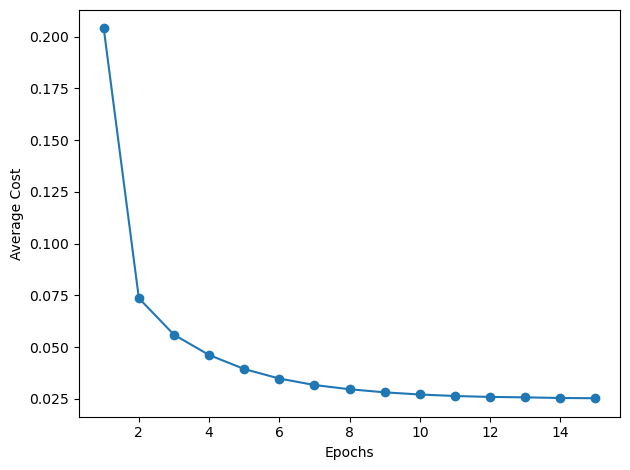

In [24]:
plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.tight_layout()
plt.show()

In [25]:
# Using scikit-learn

from sklearn import datasets
import numpy as np


iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1, stratify=y)

In [27]:
print('Labels counts in y:', np.bincount(y))

Labels counts in y: [50 50 50]


In [28]:
print('Labels counts in y_train:', np.bincount(y_train))

Labels counts in y_train: [35 35 35]


In [29]:
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y_test: [15 15 15]


In [30]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)

x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [31]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)

ppn.fit(x_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [32]:
y_pred = ppn.predict(x_test_std)

print('Misclassified examples: %d'%(y_test != y_pred).sum())

Misclassified examples: 1


In [33]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.978


In [34]:
print('Accuracy: %.3f' % ppn.score(x_test_std, y_test))

Accuracy: 0.978


In [35]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None,resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=colors[idx],
        marker=markers[idx], label=cl,
        edgecolor='black')
        
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
        c='', edgecolor='black', alpha=1.0,
        linewidth=1, marker='o',
        s=100, label='test set')

/tmp/ipykernel_6008/3520923649.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ''

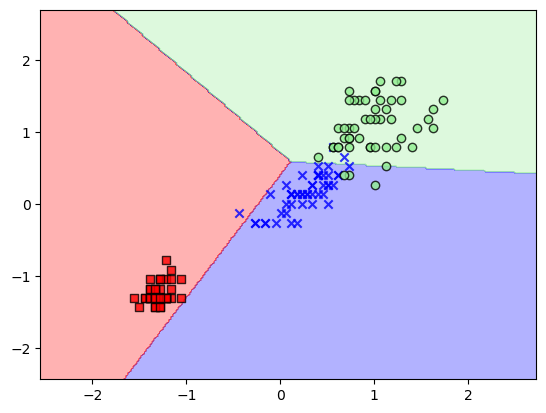

In [38]:
X_combined_std = np.vstack((x_train_std, x_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [43]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

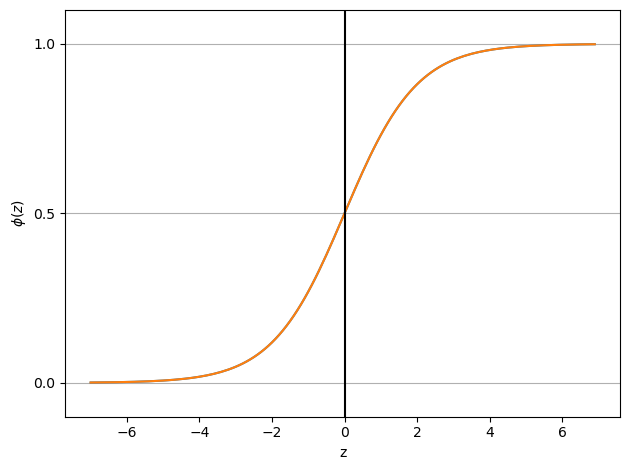

In [44]:
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

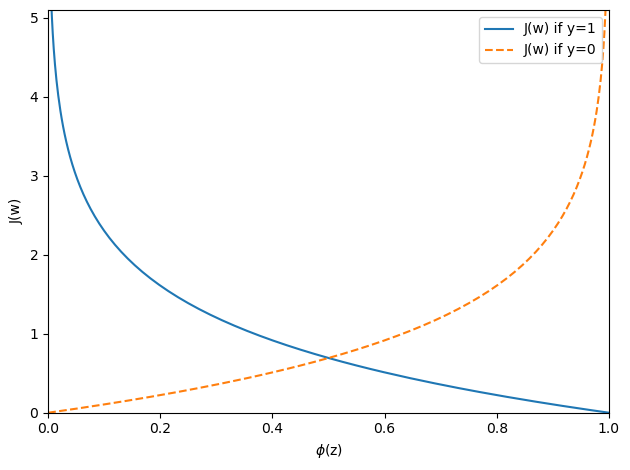

In [48]:
def cost_1(z):
    return - np.log(sigmoid(z))

def cost_0(z):
    return - np.log(1-sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label= 'J(w) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [53]:
class LogisticRegressionGD:
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def net_input(self, x):
        return np.dot(x, self.w_[1:]) + self.w_[0]
        
    def activation(self, x):
        return 1.0 / (1.0 + np.exp(-np.clip(x, -250, 250)))
    
    def fit(self, x, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+x.shape[1])
        
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(x)
            output = self.activation(net_input)
            errors = y - output
            self.w_[1:] += self.eta * x.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (-y.dot(np.log(output))-(1-y).dot(np.log(1-output)))
            self.cost_.append(cost)
        return self
            
    def predict(self, x):
        return np.where(self.activation(self.net_input(x))>=0.5, 1, 0)

In [54]:
x_train_01_subset = x_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

In [55]:
lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)

In [56]:
lrgd.fit(x_train_01_subset, y_train_01_subset)

/tmp/ipykernel_6008/3520923649.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


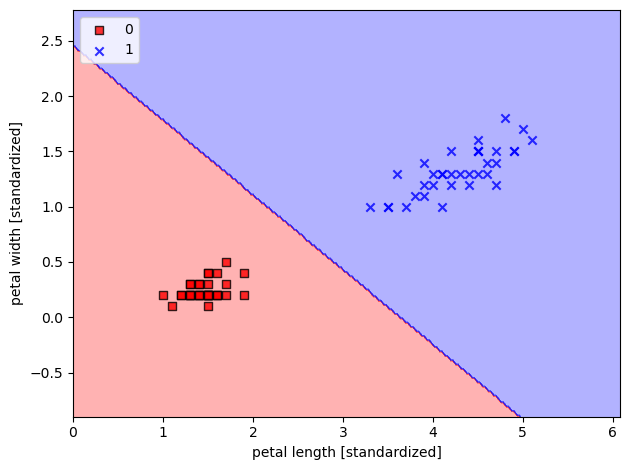

In [59]:
plot_decision_regions(X=x_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipykernel_6008/3520923649.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ''

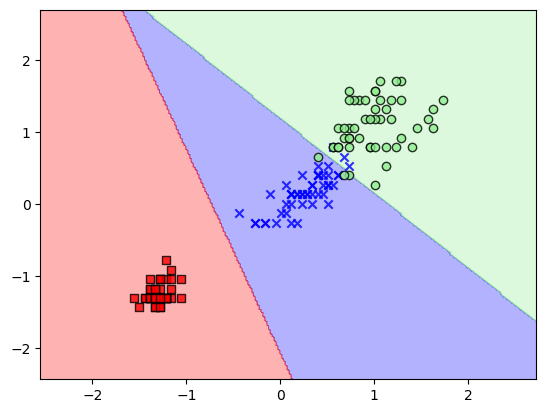

In [60]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')

lr.fit(x_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [62]:
# The probability that training examples belong to a certain class

lr.predict_proba(x_test_std[:3, :])

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

In [65]:
lr.predict_proba(x_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [66]:
lr.predict(x_test_std[:3, :])

array([2, 0, 0])

In [68]:
lr.predict(x_test_std[0, :].reshape(1, -1))

array([2])

In [72]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1, solver='lbfgs', multi_class='ovr')
    lr.fit(x_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

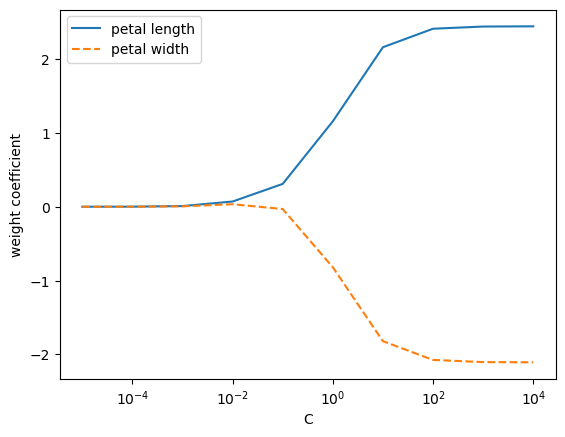

In [73]:
weights = np.array(weights)
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()